# Лабораторная работа №3
### Прогнозирование временных рядов: модель AR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

from sklearn.metrics import mean_squared_error

sns.set(style='whitegrid')

### Загрузка и предварительный осмотр данных

In [2]:
# Загружаем временной ряд
series = pd.read_csv('/content/sample_data/tovar_moving.csv', index_col='date', parse_dates=True, dayfirst=True)
series.index.freq = 'D'
series.head()

<ipython-input-2-f66b3fb9abc6>:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  series = pd.read_csv('/content/sample_data/tovar_moving.csv', index_col='date', parse_dates=True, dayfirst=True)


,qty
date,
2009-12-25,72314.0
2009-12-26,66586.0
2009-12-27,125199.0
2009-12-28,91544.0
2009-12-29,76995.0


### Шаг 1: Разделение временного ряда на обучающую и тестовую выборки

In [3]:
# Последнее значение используем как тест
train = series.iloc[:-1]
test = series.iloc[-1:]

print(f"Последняя дата: {test.index[0].date()} — количество: {test.values[0][0]}")

Последняя дата: 2013-12-02 — количество: 423846.0


### Шаг 2: Анализ структуры временного ряда

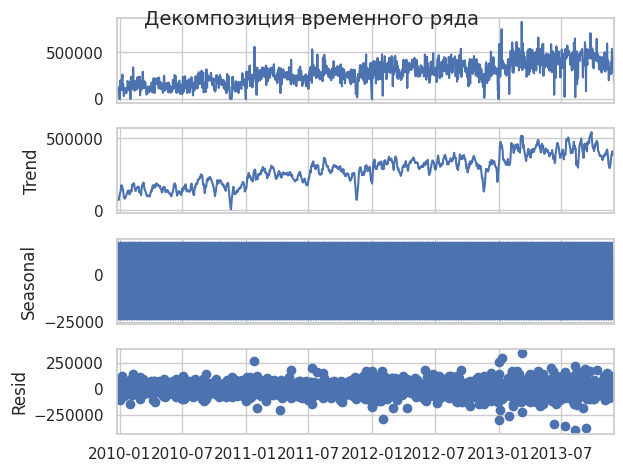

In [4]:
decomp = sm.tsa.seasonal_decompose(train, model='additive')
decomp.plot()
plt.suptitle('Декомпозиция временного ряда', fontsize=14)
plt.show()

### Шаг 3: Экспоненциальное сглаживание (α = 0.7)

In [5]:
model_exp = SimpleExpSmoothing(train).fit(smoothing_level=0.7, optimized=False)
pred_exp = model_exp.forecast(1)

print(f"Прогноз (экспоненциальное сглаживание): {pred_exp.values[0]:.2f}")
print(f"Фактическое значение: {test.values[0][0]}")

Прогноз (экспоненциальное сглаживание): 225015.52
Фактическое значение: 423846.0


### Шаг 4: Проверка на стационарность (ADF-тест)

In [6]:
adf_result = adfuller(train.squeeze())
print(f"ADF statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")

ADF statistic: -2.2553
p-value: 0.1868


### Шаг 5: Определение порядка AR по PACF-графику

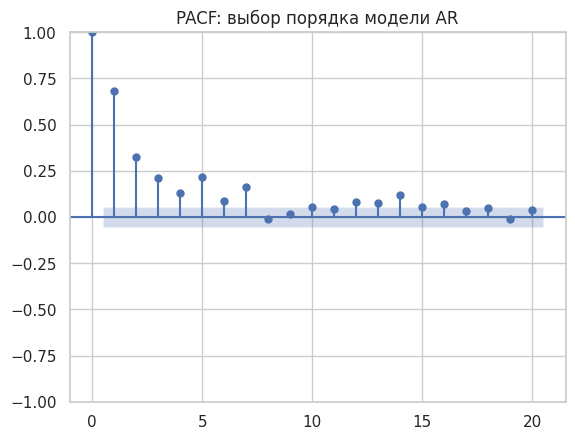

In [7]:
plot_pacf(train, lags=20)
plt.title('PACF: выбор порядка модели AR')
plt.show()

### Шаг 6: Построение и прогноз модели авторегрессии (AR)

In [8]:
# Предположим по PACF, что оптимальный лаг — 3
model_ar = AutoReg(train, lags=3).fit()
pred_ar = model_ar.predict(start=len(train), end=len(train))

print(f"Прогноз AR-модели: {pred_ar.values[0]:.2f}")
print(f"Фактическое значение: {test.values[0][0]}")

Прогноз AR-модели: 283545.52
Фактическое значение: 423846.0


### Шаг 7: Сравнение результатов моделей

In [10]:
rmse_exp = mean_squared_error(test, pred_exp) ** 0.5
rmse_ar = mean_squared_error(test, pred_ar) ** 0.5

print(f"RMSE экспоненциального сглаживания: {rmse_exp:.2f}")
print(f"RMSE AR-модели: {rmse_ar:.2f}")

RMSE экспоненциального сглаживания: 198830.48
RMSE AR-модели: 140300.48


### Вывод

В данной лабораторной работе были применены два метода прогнозирования — экспоненциальное сглаживание и авторегрессия. На основе сравнения RMSE можно сделать вывод, какая модель показала себя лучше. Также проведён анализ сезонности и тренда, а также проверка на стационарность временного ряда.